# ML MODEL DEVELOPMENT FOR MENTAL HEALTH DATASET

#### I selected a mental health dataset from Kaggle to conduct ML model development and optimization and to analyze the key features of the dataset.
##### For Data reference : https://www.kaggle.com/datasets/bhadramohit/mental-health-dataset

## PART -1 Initial data inspection 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
mental= pd.read_csv(r"D:\Aadhitya\Downloads\mental_health_dataset.csv")
mental

,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours
0,1,36,Non-binary,Sales,Canada,No,Medium,Yes,Medium,7.1,46,5
1,2,34,Female,Education,UK,Yes,None,No,Low,7.5,47,8
2,3,65,Non-binary,Sales,USA,Yes,High,No,Low,8.4,58,10
3,4,34,Male,Other,Australia,No,Low,No,Medium,9.8,30,2
4,5,22,Female,Healthcare,Canada,Yes,Low,No,Medium,4.9,62,5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,46,Non-binary,Other,Germany,No,None,Yes,Low,9.3,50,0
996,997,31,Male,Sales,Canada,No,None,No,High,4.5,37,6
997,998,33,Female,IT,Germany,No,High,Yes,Medium,9.7,73,10
998,999,42,Female,Finance,Australia,Yes,None,No,Medium,6.5,79,8


In [3]:
mental.describe()

,User_ID,Age,Sleep_Hours,Work_Hours,Physical_Activity_Hours
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.89200,7.095600,54.621000,5.134000
std,288.819436,13.97475,1.713861,14.709035,3.081808
min,1.000000,18.00000,4.000000,30.000000,0.000000
25%,250.750000,30.00000,5.600000,42.000000,3.000000
50%,500.500000,42.00000,7.100000,55.000000,5.000000
75%,750.250000,54.00000,8.500000,67.000000,8.000000
max,1000.000000,65.00000,10.000000,80.000000,10.000000


In [4]:
mental.dtypes

User_ID                      int64
Age                          int64
Gender                      object
Occupation                  object
Country                     object
Mental_Health_Condition     object
Severity                    object
Consultation_History        object
Stress_Level                object
Sleep_Hours                float64
Work_Hours                   int64
Physical_Activity_Hours      int64
dtype: object

In [5]:
mental.nunique()

User_ID                    1000
Age                          48
Gender                        4
Occupation                    7
Country                       7
Mental_Health_Condition       2
Severity                      4
Consultation_History          2
Stress_Level                  3
Sleep_Hours                  61
Work_Hours                   51
Physical_Activity_Hours      11
dtype: int64

In [6]:
mental.isna().sum()

User_ID                    0
Age                        0
Gender                     0
Occupation                 0
Country                    0
Mental_Health_Condition    0
Severity                   0
Consultation_History       0
Stress_Level               0
Sleep_Hours                0
Work_Hours                 0
Physical_Activity_Hours    0
dtype: int64

In [7]:
Categorical_Values = ['Stress_Level','Gender','Occupation','Country','Severity','Mental_Health_Condition']
for i in Categorical_Values:
    print(i,' ',mental[i].unique())

Stress_Level   ['Medium' 'Low' 'High']
Gender   ['Non-binary' 'Female' 'Male' 'Prefer not to say']
Occupation   ['Sales' 'Education' 'Other' 'Healthcare' 'IT' 'Engineering' 'Finance']
Country   ['Canada' 'UK' 'USA' 'Australia' 'India' 'Other' 'Germany']
Severity   ['Medium' 'None' 'High' 'Low']
Mental_Health_Condition   ['No' 'Yes']


### Initial Observations
The dataset contains the following features:

User_ID: Unique identifier for each respondent.

Age: Age of the respondent.

Gender: Gender identity (e.g., Male, Female, Non-binary).

Occupation: Job category.

Country: Country of residence.

Mental_Health_Condition: Presence of a mental health condition (Yes/No).

Severity: Severity of the mental health condition if present.

Consultation_History: History of consultation for mental health issues (Yes/No).

Stress_Level: Stress level (e.g., Low, Medium, High).

Sleep_Hours: Average hours of sleep per day.

Work_Hours: Average weekly work hours.

Physical_Activity_Hours: Average hours of physical activity per week.

Rows = 1000
Colomns = 20

Note to myself - The Gender feature contains a unique value, 'Prefer not to say', which we consider as Missing Not At Random (MNAR). To handle this, we plan to apply KNN imputation during the preprocessing phase. Next, we will proceed with univariate and bivariate analysis to identify any other irregularities, such as kurtosis, skewness, and outliers, and will perform further data cleaning as needed

## PART -2 Univariate and Bivariate Analysis

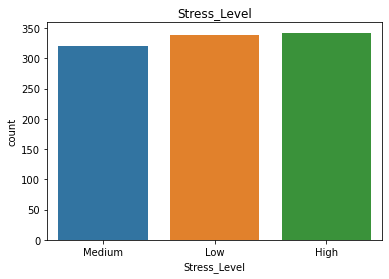

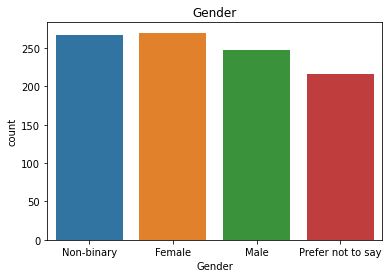

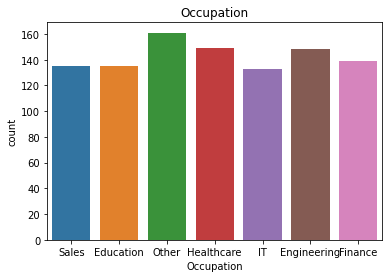

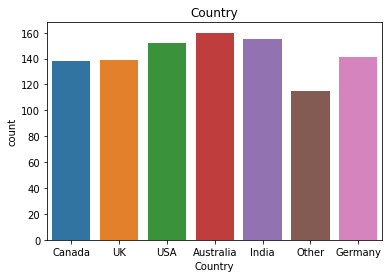

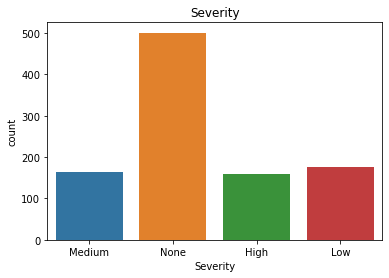

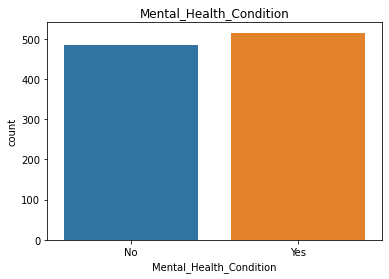

In [8]:
for i in Categorical_Values:
    sns.countplot(x=i, data=mental)
    plt.title(i)
    plt.show()

We start with countplot for categorical data to check whether the data is sufficiently spread accross all the categories. In 'Severity' the value none has a higher concentration than other values.

In [9]:
Numerical_Values = ['Age','Sleep_Hours','Work_Hours','Physical_Activity_Hours']

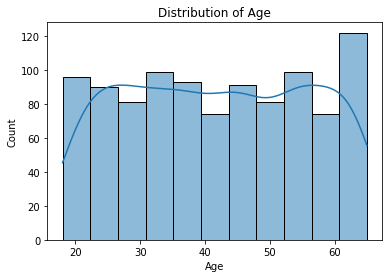

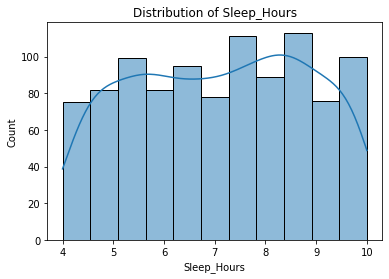

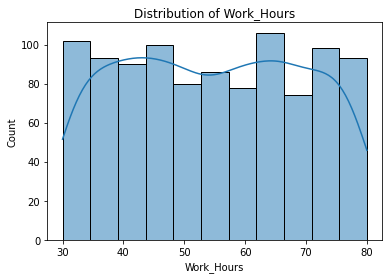

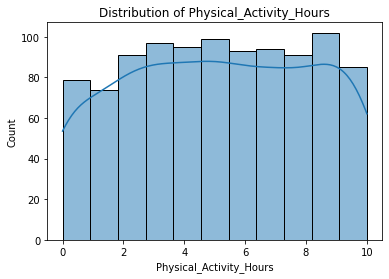

In [10]:
for i in Numerical_Values:
    sns.histplot(mental[i], kde=True)
    plt.title('Distribution of '+i)
    plt.show()

Sleep_Hours and Work_hours show slight bimodality

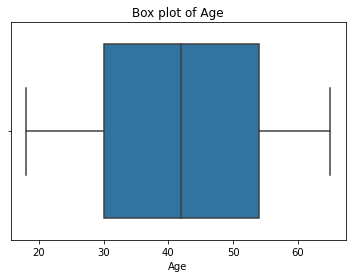

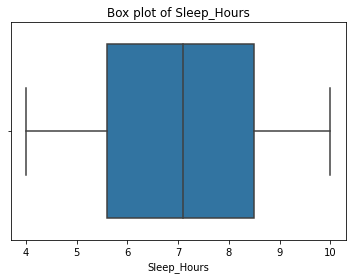

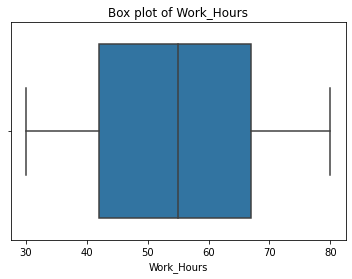

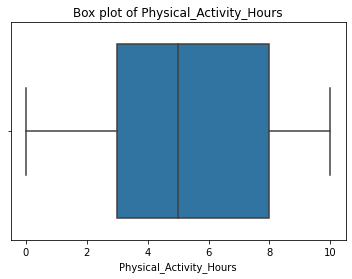

In [11]:
for i in Numerical_Values:
    sns.boxplot(x=mental[i])
    plt.title('Box plot of '+i)
    plt.show()

In [12]:
Mental_health_no_count = mental[mental['Mental_Health_Condition'] == 'No'].shape[0]
Severity_none_count = mental[mental['Severity']=='None'].shape[0]
print(Mental_health_no_count)
print(Severity_none_count)# just for checking

485
501


### Univariate Summary:

#### 1)Numerical Features

Age: The age distribution is roughly uniformly distributed.

Sleep_Hours: The data shows a near-normal distribution, with most participants reporting between 7-9 hours of sleep

Work_Hours: This feature has a wide range, with some participants reporting notably high weekly work hours. This variability could impact mental health

Physical_Activity_Hours: The distribution is fairly even

Each histogram has a similar count across various bins, which suggests that the data is roughly evenly distributed. There’s no significant clustering around a particular range.

#### 2)Categorical Features

Gender: Categories include Male, Female, Non-binary, and Prefer not to say. Most participants identify as Male or Female. Need to handle Prefer not say as MNAR value

Occupation: A diverse set of occupations is present, including Sales, Education, Healthcare, Engineering, and more, reflecting a variety of work environments.

Country: Participants are from multiple countries, primarily the USA, UK, Canada, and Australia, with others grouped under "Other."

Mental_Health_Condition: Binary indicator (Yes/No) representing the presence of a mental health condition.

Severity: Ranges from None, Low, Medium, to High, showing varying levels of mental health condition severity among participants.


Consultation_History: Indicates whether participants have sought mental health consultation, which may provide insights into coping mechanisms.

Stress_Level: Includes Low, Medium, and High categories, with most participants reporting medium stress.

#### Outliers

A small number of outliers were observed in Age, Sleep_Hours, Work_Hours, and Physical_Activity_Hours. These represent unique cases within the dataset that could offer additional insights.

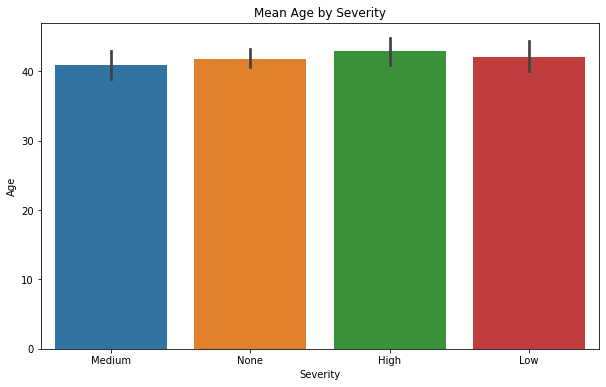

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Severity', y='Age', data=mental, estimator=np.mean)
plt.title('Mean Age by Severity')
plt.show()

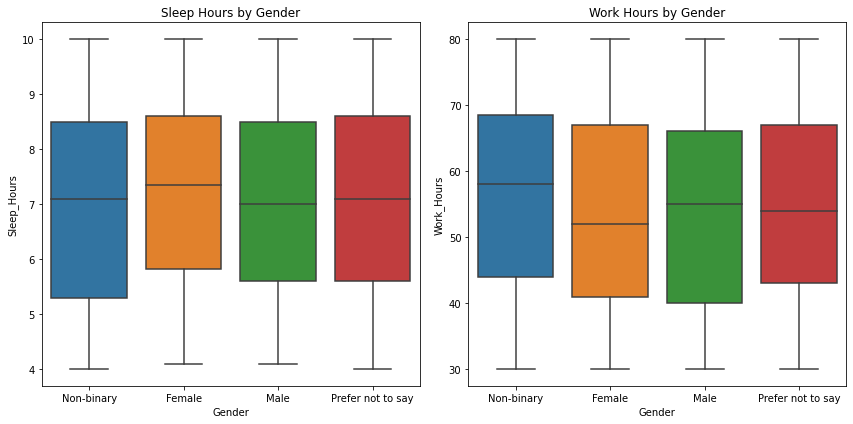

In [14]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Gender', y='Sleep_Hours', data=mental)
plt.title('Sleep Hours by Gender')
plt.subplot(1, 2, 2)
sns.boxplot(x='Gender', y='Work_Hours', data=mental)
plt.title('Work Hours by Gender')

plt.tight_layout()
plt.show()

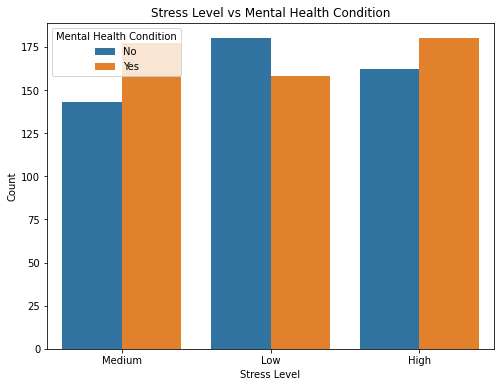

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Stress_Level', hue='Mental_Health_Condition', data=mental)
plt.title('Stress Level vs Mental Health Condition')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Mental Health Condition')
plt.show()

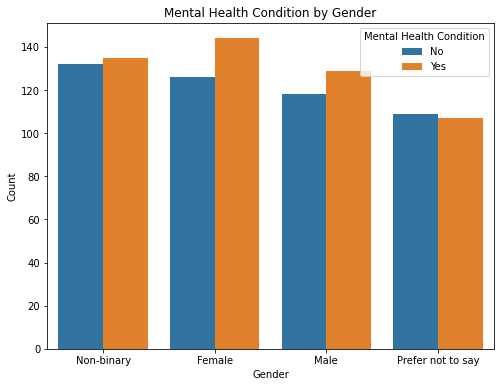

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Mental_Health_Condition', data=mental)
plt.title('Mental Health Condition by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Mental Health Condition')
plt.show()

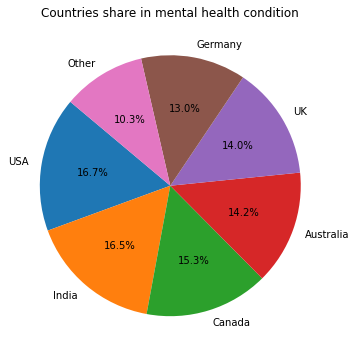

In [17]:
mental_filtered = mental[mental['Mental_Health_Condition']=='Yes']
category_counts = mental_filtered['Country'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))  
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)

# Title and display the chart
plt.title('Countries share in mental health condition')
plt.show()

The chart shows that the United States and India have a larger proportion of people with mental health conditions compared to other countries.

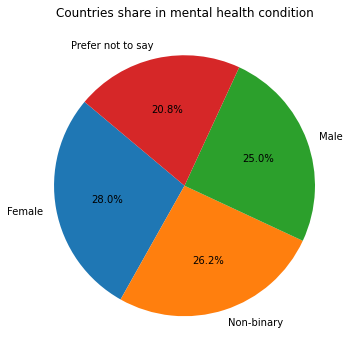

In [18]:

category_counts = mental_filtered['Gender'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))  
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)

# Title and display the chart
plt.title('Countries share in mental health condition')
plt.show()


The pie chart reveals that a higher proportion of women experience mental health conditions compared to men.

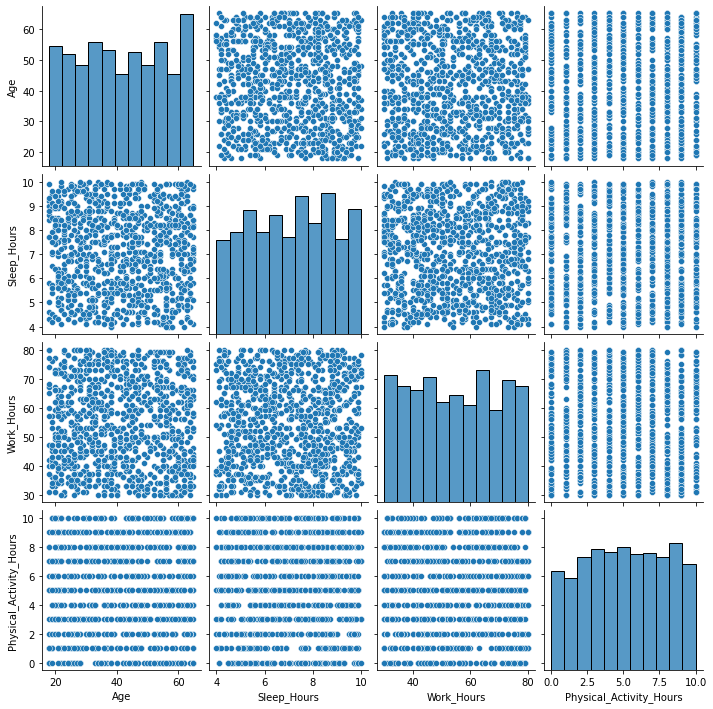

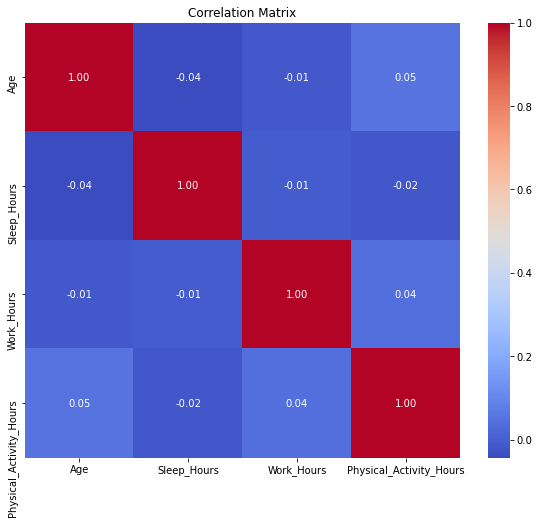

In [19]:
drop_cols = ['User_ID', 'Gender', 'Occupation', 'Country', 'Mental_Health_Condition', 'Severity', 'Consultation_History']
numeric_df = mental.drop(columns=drop_cols)

# Visualize relationships between numeric variables using pairplot
sns.pairplot(numeric_df)
plt.show()

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Generate a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


### Bivariate  and Multivariate Analysis Summary

#### Numerical-Numerical Relationships
##### Correlation Matrix:

A heatmap of correlation coefficients was generated to assess the linear relationships between numerical features.

The correlation values between numerical features such as "Age," "Sleep Hours," "Work Hours," and "Physical Activity Hours" were generally low (close to zero), indicating weak or no linear relationships.

This suggests that the numerical features likely do not strongly influence each other, meaning they might contribute independently in further analysis or modeling.

##### Scatter Plots:

Scatter plots for various numerical feature pairs were examined in the pair plot.

No strong patterns or trends (such as clear positive or negative slopes) were observed, reinforcing the low correlation between numerical features.

This lack of strong relationships indicates that these variables might not co-vary significantly, but each may have unique contributions when combined with other features.

#### Categorical-Numerical Relationships

##### Box Plots:

Box plots were used to compare distributions of numerical features across different categories.

Comparing "Sleep Hours" and "Work Hours" across "Gender" revealed some slight variations, but no significant differences between categories.

##### Bar Chart :

Bar charts were used to show counts within categorical features, broken down by other categorical or numerical features.

Analyzing "Stress Level" across "Mental Health Condition" indicated that higher stress levels were more common among those with a mental health condition.

This kind of analysis helps highlight how one categorical variable (such as stress level) may be associated with another, potentially informing further analysis or prediction models.

#### Categorical-Categorical Relationships
##### Count Plots:
Count plots were used to visualize the distribution of one categorical feature in the context of another.

For instance, plotting "Gender" against "Mental Health Condition" showed a higher proportion of women experiencing mental health conditions compared to men.

Such visualizations provide insight into relationships between categorical variables, helping to identify potential trends or imbalances within groups.

##### Pie Chart:

Pie charts were used to compare the spred of categorical features when Mental_Health_Condition is set to Yes.

#### Key Observations
There appears to be a relationship between stress levels and mental health conditions, with higher stress being more common in individuals with mental health conditions.

Gender differences in mental health prevalence were observed, with women showing a higher proportion of mental health conditions than men.

No strong correlations were found between numerical variables, indicating that each may provide unique information when used in modeling.

United States and India have a larger proportion of people with mental health conditions compared to other countries.

## Part - 3 Data Cleaning and Feature Engineering

In [20]:
mental_cleaned = mental.copy()

mental_cleaned #making a copy to perform all preprocessing, this is done so that I would always have a base  version

,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours
0,1,36,Non-binary,Sales,Canada,No,Medium,Yes,Medium,7.1,46,5
1,2,34,Female,Education,UK,Yes,None,No,Low,7.5,47,8
2,3,65,Non-binary,Sales,USA,Yes,High,No,Low,8.4,58,10
3,4,34,Male,Other,Australia,No,Low,No,Medium,9.8,30,2
4,5,22,Female,Healthcare,Canada,Yes,Low,No,Medium,4.9,62,5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,46,Non-binary,Other,Germany,No,None,Yes,Low,9.3,50,0
996,997,31,Male,Sales,Canada,No,None,No,High,4.5,37,6
997,998,33,Female,IT,Germany,No,High,Yes,Medium,9.7,73,10
998,999,42,Female,Finance,Australia,Yes,None,No,Medium,6.5,79,8


In [21]:
mental_cleaned['Gender'] = mental_cleaned['Gender'].replace('Prefer not to say', pd.NA)

# Encoding Gender as binary for imputation
gender_mapping = {'Male': 0, 'Female': 1, 'Non-binary': 2}
mental_cleaned['Gender'] = mental_cleaned['Gender'].map(gender_mapping)

mental_cleaned['Gender'].value_counts()

1.0    270
2.0    267
0.0    247
Name: Gender, dtype: int64

In [22]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
Gender_data = mental_cleaned[['Gender']]
data_imputed = knn_imputer.fit_transform(Gender_data)
Gender_df = pd.DataFrame(data_imputed, columns=['Gender']).round(0).astype(int)

In [23]:
Gender_df

,Gender
0,2
1,1
2,2
3,0
4,1
...,...
995,2
996,0
997,1
998,1


In [24]:
mental_cleaned['Gender'] = Gender_df
mental_cleaned

,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours
0,1,36,2,Sales,Canada,No,Medium,Yes,Medium,7.1,46,5
1,2,34,1,Education,UK,Yes,None,No,Low,7.5,47,8
2,3,65,2,Sales,USA,Yes,High,No,Low,8.4,58,10
3,4,34,0,Other,Australia,No,Low,No,Medium,9.8,30,2
4,5,22,1,Healthcare,Canada,Yes,Low,No,Medium,4.9,62,5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,46,2,Other,Germany,No,None,Yes,Low,9.3,50,0
996,997,31,0,Sales,Canada,No,None,No,High,4.5,37,6
997,998,33,1,IT,Germany,No,High,Yes,Medium,9.7,73,10
998,999,42,1,Finance,Australia,Yes,None,No,Medium,6.5,79,8


In [25]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
severity_encoded = label_encoder.fit_transform(mental_cleaned['Severity'])

mental_cleaned['Severity'] = severity_encoded
mental_cleaned

,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours
0,1,36,2,Sales,Canada,No,2,Yes,Medium,7.1,46,5
1,2,34,1,Education,UK,Yes,3,No,Low,7.5,47,8
2,3,65,2,Sales,USA,Yes,0,No,Low,8.4,58,10
3,4,34,0,Other,Australia,No,1,No,Medium,9.8,30,2
4,5,22,1,Healthcare,Canada,Yes,1,No,Medium,4.9,62,5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,46,2,Other,Germany,No,3,Yes,Low,9.3,50,0
996,997,31,0,Sales,Canada,No,3,No,High,4.5,37,6
997,998,33,1,IT,Germany,No,0,Yes,Medium,9.7,73,10
998,999,42,1,Finance,Australia,Yes,3,No,Medium,6.5,79,8


In [26]:
Consultation_History_encoded = label_encoder.fit_transform(mental_cleaned['Consultation_History'])

mental_cleaned['Consultation_History'] = Consultation_History_encoded
mental_cleaned

,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours
0,1,36,2,Sales,Canada,No,2,1,Medium,7.1,46,5
1,2,34,1,Education,UK,Yes,3,0,Low,7.5,47,8
2,3,65,2,Sales,USA,Yes,0,0,Low,8.4,58,10
3,4,34,0,Other,Australia,No,1,0,Medium,9.8,30,2
4,5,22,1,Healthcare,Canada,Yes,1,0,Medium,4.9,62,5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,46,2,Other,Germany,No,3,1,Low,9.3,50,0
996,997,31,0,Sales,Canada,No,3,0,High,4.5,37,6
997,998,33,1,IT,Germany,No,0,1,Medium,9.7,73,10
998,999,42,1,Finance,Australia,Yes,3,0,Medium,6.5,79,8


In [27]:
Mental_Health_Condition_encoded = label_encoder.fit_transform(mental_cleaned['Mental_Health_Condition'])

mental_cleaned['Mental_Health_Condition'] = Mental_Health_Condition_encoded
mental_cleaned

,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours
0,1,36,2,Sales,Canada,0,2,1,Medium,7.1,46,5
1,2,34,1,Education,UK,1,3,0,Low,7.5,47,8
2,3,65,2,Sales,USA,1,0,0,Low,8.4,58,10
3,4,34,0,Other,Australia,0,1,0,Medium,9.8,30,2
4,5,22,1,Healthcare,Canada,1,1,0,Medium,4.9,62,5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,46,2,Other,Germany,0,3,1,Low,9.3,50,0
996,997,31,0,Sales,Canada,0,3,0,High,4.5,37,6
997,998,33,1,IT,Germany,0,0,1,Medium,9.7,73,10
998,999,42,1,Finance,Australia,1,3,0,Medium,6.5,79,8


In [28]:
Stress_Level_encoded = label_encoder.fit_transform(mental_cleaned['Stress_Level'])

mental_cleaned['Stress_Level'] = Stress_Level_encoded
mental_cleaned

,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours
0,1,36,2,Sales,Canada,0,2,1,2,7.1,46,5
1,2,34,1,Education,UK,1,3,0,1,7.5,47,8
2,3,65,2,Sales,USA,1,0,0,1,8.4,58,10
3,4,34,0,Other,Australia,0,1,0,2,9.8,30,2
4,5,22,1,Healthcare,Canada,1,1,0,2,4.9,62,5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,46,2,Other,Germany,0,3,1,1,9.3,50,0
996,997,31,0,Sales,Canada,0,3,0,0,4.5,37,6
997,998,33,1,IT,Germany,0,0,1,2,9.7,73,10
998,999,42,1,Finance,Australia,1,3,0,2,6.5,79,8


In [29]:
mental_cleaned.isna().sum()

User_ID                    0
Age                        0
Gender                     0
Occupation                 0
Country                    0
Mental_Health_Condition    0
Severity                   0
Consultation_History       0
Stress_Level               0
Sleep_Hours                0
Work_Hours                 0
Physical_Activity_Hours    0
dtype: int64

In [30]:
mental_cleaned = pd.get_dummies(mental_cleaned, columns=[ 'Occupation', 'Country'], drop_first=True)
mental_cleaned

,User_ID,Age,Gender,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours,...,Occupation_Healthcare,Occupation_IT,Occupation_Other,Occupation_Sales,Country_Canada,Country_Germany,Country_India,Country_Other,Country_UK,Country_USA
0,1,36,2,0,2,1,2,7.1,46,5,...,0,0,0,1,1,0,0,0,0,0
1,2,34,1,1,3,0,1,7.5,47,8,...,0,0,0,0,0,0,0,0,1,0
2,3,65,2,1,0,0,1,8.4,58,10,...,0,0,0,1,0,0,0,0,0,1
3,4,34,0,0,1,0,2,9.8,30,2,...,0,0,1,0,0,0,0,0,0,0
4,5,22,1,1,1,0,2,4.9,62,5,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,46,2,0,3,1,1,9.3,50,0,...,0,0,1,0,0,1,0,0,0,0
996,997,31,0,0,3,0,0,4.5,37,6,...,0,0,0,1,1,0,0,0,0,0
997,998,33,1,0,0,1,2,9.7,73,10,...,0,1,0,0,0,1,0,0,0,0
998,999,42,1,1,3,0,2,6.5,79,8,...,0,0,0,0,0,0,0,0,0,0


### Summary of Encoding Process:

1) Manually encoded the Gender column, setting "Prefer not to say" values to NaN to enable KNN imputation. Then performed KNN imputation with neighbors =5

2) Applied label encoding to the Stress_Level, Mental_Health_Condition, Consultation_History, and Severity columns, as these values were nominal (one value had a higher ranking than another).

3) Used one-hot encoding for the Occupation and Country columns, as these values were not nominal.

In [31]:
mental_cleaned['Work_Life_Balance'] = mental_cleaned['Work_Hours'] / (mental_cleaned['Physical_Activity_Hours'] + 1)

mental_cleaned['Stress_Sleep_Ratio'] = mental_cleaned['Stress_Level'] / mental_cleaned['Sleep_Hours']

mental_cleaned['Mental_Health_Risk_Factor'] = (mental_cleaned['Mental_Health_Condition'] + mental_cleaned['Severity'] + mental_cleaned['Consultation_History'] + mental_cleaned['Stress_Level']) / 4

In [32]:
mental_cleaned

,User_ID,Age,Gender,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours,...,Occupation_Sales,Country_Canada,Country_Germany,Country_India,Country_Other,Country_UK,Country_USA,Work_Life_Balance,Stress_Sleep_Ratio,Mental_Health_Risk_Factor
0,1,36,2,0,2,1,2,7.1,46,5,...,1,1,0,0,0,0,0,7.666667,0.281690,1.25
1,2,34,1,1,3,0,1,7.5,47,8,...,0,0,0,0,0,1,0,5.222222,0.133333,1.25
2,3,65,2,1,0,0,1,8.4,58,10,...,1,0,0,0,0,0,1,5.272727,0.119048,0.50
3,4,34,0,0,1,0,2,9.8,30,2,...,0,0,0,0,0,0,0,10.000000,0.204082,0.75
4,5,22,1,1,1,0,2,4.9,62,5,...,0,1,0,0,0,0,0,10.333333,0.408163,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,46,2,0,3,1,1,9.3,50,0,...,0,0,1,0,0,0,0,50.000000,0.107527,1.25
996,997,31,0,0,3,0,0,4.5,37,6,...,1,1,0,0,0,0,0,5.285714,0.000000,0.75
997,998,33,1,0,0,1,2,9.7,73,10,...,0,0,1,0,0,0,0,6.636364,0.206186,0.75
998,999,42,1,1,3,0,2,6.5,79,8,...,0,0,0,0,0,0,0,8.777778,0.307692,1.50


In [33]:
columns_added = ['Work_Life_Balance','Stress_Sleep_Ratio','Mental_Health_Risk_Factor']

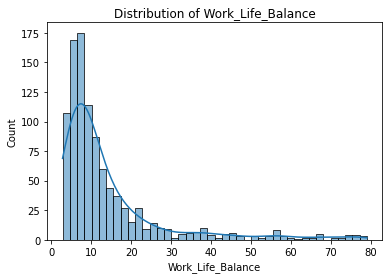

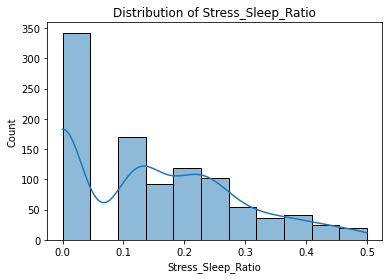

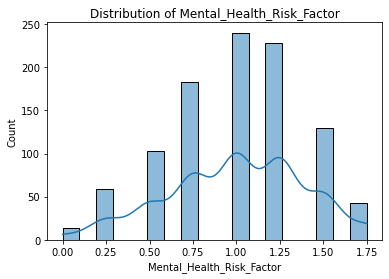

In [34]:
for i in columns_added:
    sns.histplot(mental_cleaned[i], kde=True)
    plt.title('Distribution of '+i)
    plt.show()

In [35]:
mental_cleaned['Work_Life_Balance'] = np.log(mental_cleaned['Work_Life_Balance'] + 1)
mental_cleaned['Stress_Sleep_Ratio'] = np.sqrt(mental_cleaned['Stress_Sleep_Ratio'] + 1)


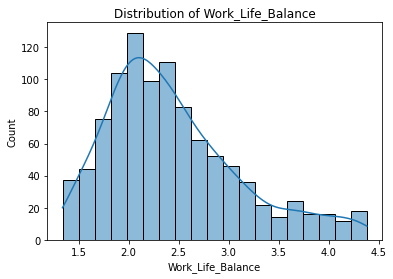

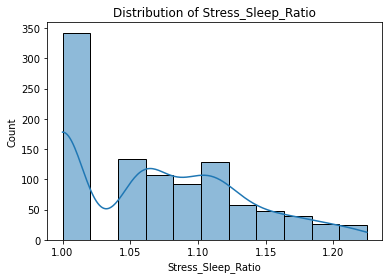

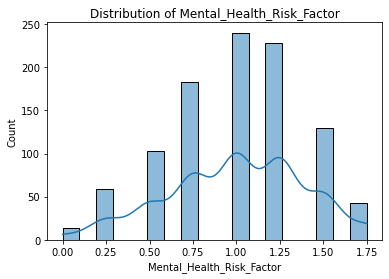

In [36]:
for i in columns_added:
    sns.histplot(mental_cleaned[i], kde=True)
    plt.title('Distribution of '+i)
    plt.show()

### Summary of Feature Creation/ Transformation process:


1)Work_Life_Balance -This variable was created to measure the balance between a person’s work hours and the time they dedicate to physical activity. It provides an indicator of whether someone might be overworking without sufficient time for exercise, which can impact their overall health and mental well-being.


Higher values indicate a poor balance,Lower values indicate a better work-life balance .

Observed Distribution:
This feature showed a strong right skew, indicating that many individuals have high work hours relative to physical activity. Most people have lower scores, with a few extreme cases of high imbalance.

Transformation:
A log transformation was applied to reduce the skewness, which helped normalize the distribution somewhat, making it more suitable for analysis.

2)Stress_Sleep_Ratio- This feature captures the relationship between stress level and sleep duration, providing insight into whether an individual's sleep is adequate to help manage their stress. A high ratio could suggest that someone’s sleep may be insufficient to counterbalance their stress, potentially leading to mental health challenges.


Higher ratios indicate high stress with low sleep, which may signal a struggle to cope with stress effectively.

Lower ratios suggest either low stress or sufficient sleep to help mitigate stress effects.

Observed Distribution:
This feature also exhibited a strong right skew, likely due to a few individuals with high stress and low sleep values.

Transformation Attempts:
Both log and square root transformations were attempted, but neither was effective in reducing the skewness significantly. The data distribution remained skewed, which may indicate an underlying issue with this variable or that the skewness is inherent to the population in the data.

3)Mental_Health_Risk_Factor- This variable combines several indicators of mental health risk, such as mental health condition, severity of symptoms, consultation history, and stress level. It provides an overall “risk score” that indicates how much an individual may be at risk for mental health challenges.


Higher scores indicate a higher risk of mental health issues, as they are associated with existing conditions, higher stress, or more severe symptoms.

Lower scores indicate a lower risk, suggesting fewer mental health issues or low levels of stress and severity.

Observed Distribution:
This feature was multi-modal, with several distinct peaks, possibly representing different subgroups within the population (e.g., individuals with low, medium, and high risk).


In [38]:
from sklearn.preprocessing import StandardScaler
columns_to_standardize = ['Age', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours','Work_Life_Balance','Stress_Sleep_Ratio','Mental_Health_Risk_Factor']
scaler = StandardScaler()
scaled_values = scaler.fit_transform(mental_cleaned[columns_to_standardize])

In [39]:
mental_cleaned_standardized = mental_cleaned.copy()
mental_cleaned_normalized = mental_cleaned.copy()

In [40]:
scaled_df = pd.DataFrame(scaled_values, columns=columns_to_standardize)
scaled_df

,Age,Sleep_Hours,Work_Hours,Physical_Activity_Hours,Work_Life_Balance,Stress_Sleep_Ratio,Mental_Health_Risk_Factor
0,-0.421829,0.002569,-0.586396,-0.043503,-0.424225,0.996762,0.637536
1,-0.565015,0.236077,-0.518376,0.930439,-0.920252,-0.085591,0.637536
2,1.654381,0.761470,0.229838,1.579733,-0.908150,-0.193460,-1.265558
3,-0.565015,1.578748,-1.674707,-1.017444,-0.067335,0.438872,-0.631193
4,-1.424137,-1.281725,0.501915,-0.043503,-0.022647,1.870882,0.003172
...,...,...,...,...,...,...,...
995,0.294106,1.286863,-0.314318,-1.666739,2.228888,-0.280955,0.637536
996,-0.779796,-1.515233,-1.198571,0.281144,-0.905054,-1.120586,-0.631193
997,-0.636609,1.520371,1.250129,1.579733,-0.613684,0.454230,-0.631193
998,0.007732,-0.347693,1.658246,0.930439,-0.243651,1.179881,1.271901


In [41]:
mental_cleaned_standardized[columns_to_standardize] = scaled_df
mental_cleaned_standardized

,User_ID,Age,Gender,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours,...,Occupation_Sales,Country_Canada,Country_Germany,Country_India,Country_Other,Country_UK,Country_USA,Work_Life_Balance,Stress_Sleep_Ratio,Mental_Health_Risk_Factor
0,1,-0.421829,2,0,2,1,2,0.002569,-0.586396,-0.043503,...,1,1,0,0,0,0,0,-0.424225,0.996762,0.637536
1,2,-0.565015,1,1,3,0,1,0.236077,-0.518376,0.930439,...,0,0,0,0,0,1,0,-0.920252,-0.085591,0.637536
2,3,1.654381,2,1,0,0,1,0.761470,0.229838,1.579733,...,1,0,0,0,0,0,1,-0.908150,-0.193460,-1.265558
3,4,-0.565015,0,0,1,0,2,1.578748,-1.674707,-1.017444,...,0,0,0,0,0,0,0,-0.067335,0.438872,-0.631193
4,5,-1.424137,1,1,1,0,2,-1.281725,0.501915,-0.043503,...,0,1,0,0,0,0,0,-0.022647,1.870882,0.003172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0.294106,2,0,3,1,1,1.286863,-0.314318,-1.666739,...,0,0,1,0,0,0,0,2.228888,-0.280955,0.637536
996,997,-0.779796,0,0,3,0,0,-1.515233,-1.198571,0.281144,...,1,1,0,0,0,0,0,-0.905054,-1.120586,-0.631193
997,998,-0.636609,1,0,0,1,2,1.520371,1.250129,1.579733,...,0,0,1,0,0,0,0,-0.613684,0.454230,-0.631193
998,999,0.007732,1,1,3,0,2,-0.347693,1.658246,0.930439,...,0,0,0,0,0,0,0,-0.243651,1.179881,1.271901


In [42]:
from sklearn.preprocessing import MinMaxScaler
n_scaler = MinMaxScaler()
normalized_values = n_scaler.fit_transform(mental_cleaned[columns_to_standardize])
normalized_df = pd.DataFrame(normalized_values, columns=columns_to_standardize)
mental_cleaned_normalized[columns_to_standardize] = normalized_df
mental_cleaned_normalized

,User_ID,Age,Gender,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours,...,Occupation_Sales,Country_Canada,Country_Germany,Country_India,Country_Other,Country_UK,Country_USA,Work_Life_Balance,Stress_Sleep_Ratio,Mental_Health_Risk_Factor
0,1,0.382979,2,0,2,1,2,0.516667,0.32,0.5,...,1,1,0,0,0,0,0,0.269442,0.587856,0.714286
1,2,0.340426,1,1,3,0,1,0.583333,0.34,0.8,...,0,0,0,0,0,1,0,0.160523,0.287354,0.714286
2,3,1.000000,2,1,0,0,1,0.733333,0.56,1.0,...,1,0,0,0,0,0,1,0.163181,0.257405,0.285714
3,4,0.340426,0,0,1,0,2,0.966667,0.00,0.2,...,0,0,0,0,0,0,0,0.347808,0.432964,0.428571
4,5,0.085106,1,1,1,0,2,0.150000,0.64,0.5,...,0,1,0,0,0,0,0,0.357621,0.830544,0.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0.595745,2,0,3,1,1,0.883333,0.40,0.0,...,0,0,1,0,0,0,0,0.852017,0.233113,0.714286
996,997,0.276596,0,0,3,0,0,0.083333,0.14,0.6,...,1,1,0,0,0,0,0,0.163861,0.000000,0.428571
997,998,0.319149,1,0,0,1,2,0.950000,0.86,1.0,...,0,0,1,0,0,0,0,0.227840,0.437228,0.428571
998,999,0.510638,1,1,3,0,2,0.416667,0.98,0.8,...,0,0,0,0,0,0,0,0.309093,0.638696,0.857143


#### Summary for Scaling process:
1) The columns Age, Sleep_Hours, Work_Hours, and Physical_Activity_Hours were processed using both standardization and normalization techniques.

2)Using standardization for algorithms that assume normally distributed features.

3)Using normalization when using distance-based algorithms like KNN or neural networks.

#### Since the outliers are not significantly impacting the data distribution, I have decided to retain them for now and will address them later if they adversely affect the model's accuracy.
